In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px




# Import

In [94]:
# read the dataset
df=pd.read_csv('raw_house_data.csv')

In [95]:
# get information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [96]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


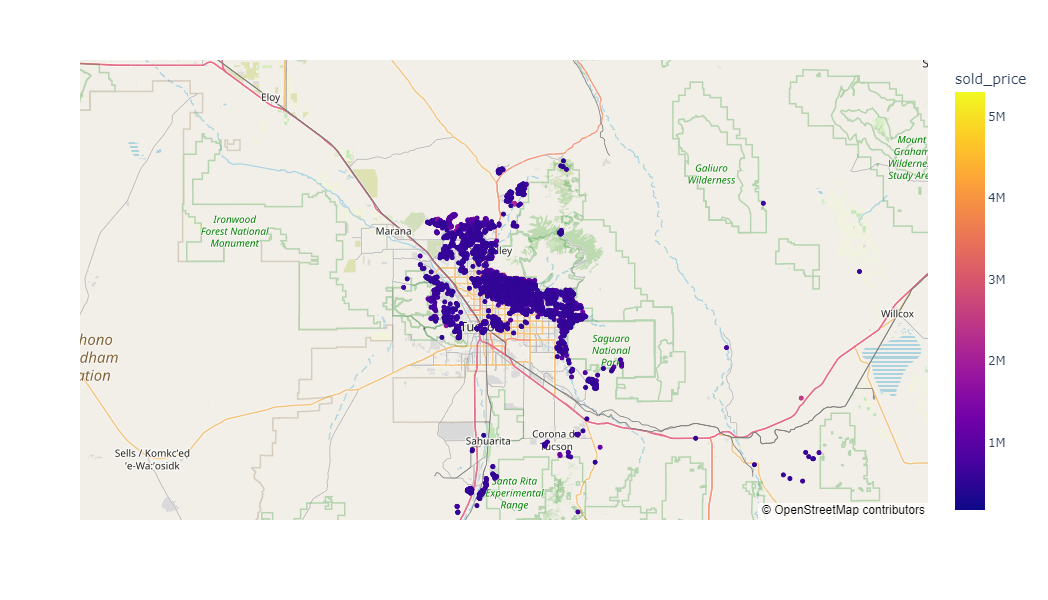

In [97]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat='latitude',
    lon='longitude',
    width=1200,  # Width of map
    height=600,  # Height of map
    color='sold_price',
    hover_data=["zipcode"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

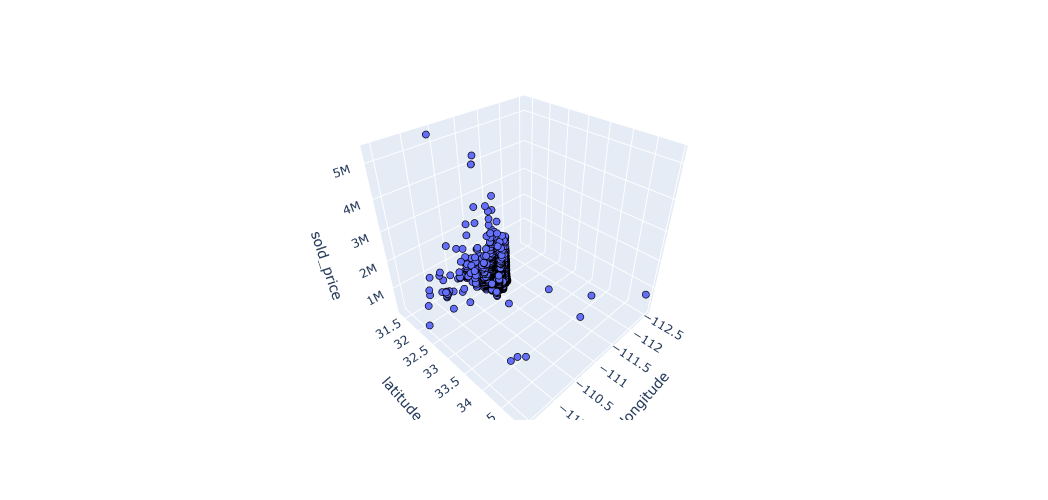

In [98]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x='longitude',
    y='latitude',
    z='sold_price',
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

## cleaning data

In [99]:
# Check for NaN
df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64

In [100]:
# drop NaN since they are only few
df.dropna(inplace=True)
df.isnull().sum()

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [101]:
# Calculate the age of the property
df['age of property']=2019-df['year_built']
df['age of property']

0       78
1       22
2       22
3       89
4       24
        ..
4995    14
4996    29
4997    50
4998    10
4999    31
Name: age of property, Length: 4990, dtype: int64

In [102]:
# Check for high and low cardinality
df.select_dtypes('object').nunique()

bathrooms             20
sqrt_ft             2362
garage                22
kitchen_features    1862
fireplaces            11
floor_covering       311
HOA                  381
dtype: int64

-- some categorical feature have missing values that could not be detected because it was a string with the word 'None'


In [103]:
# checking all categorical features
for i in df.select_dtypes('object').nunique().index:
    print(i,df[i].unique())

bathrooms ['10' '2' '3' '5' '6' '4' '8' '7' '15' '4.5' '1' '9' '11' '18' '14' '3.5'
 'None' '35' '2.5' '36']
sqrt_ft ['10500' '7300' 'None' ... '2106' '3601' '1772']
garage ['0' 'None' '4' '3' '5' '2' '6' '15' '8' '7' '4.5' '3.5' '2.5' '1' '9'
 '22' '30' '12' '10' '11' '20' '13']
kitchen_features ['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage Disposal'
 'Dishwasher, Garbage Disposal, Refrigerator' ...
 'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless'
 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Granite slab, Microwave: Stainless over oven, Oven: wall'
 'Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless']
fireplaces ['6' '5' '4' '1' '2' '3' '7' '0' '9' ' ' '8']
floor_covering ['Mexican Tile, Wood' 'Natural Stone, Other' 'Natural Stone, Other: Rock'
 'Ceramic Tile, Laminate, Wood' 'Carpet, Concrete'
 'Natural Stone, Wood, Other' 'Carpet

###  the following categories have 'None' in them
-- bathrooms.  has 'None'  
-- sqr_feet.    has 'None'  
-- garage.      has 'None'  
--fireplaces  has empty values  
-- HOA has 'None'

### kitchen_features and floor_covering has high cardinality
A categorical feature is said to possess high cardinality when there are too many of these unique values. One-Hot Encoding becomes a big problem in such a case since we have a separate column for each unique value (indicating its presence or absence) in the categorical variable.

In [104]:
# Check for high and low cardinality
df.select_dtypes('object').nunique().index

Index(['bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 'fireplaces',
       'floor_covering', 'HOA'],
      dtype='object')

'bathrooms'  - keep this but change data type  
'sqrt_ft',    keep this but change data type   
'garage',     keep this but change data type  
'kitchen_features',   drop this column   high cardinality
'fireplaces',     keep this but change data type to int
 'floor_covering',  drop this column  because of high cardinality
 'HOA'  Homeowner Association Fees  keep this but change it to float

In [105]:
# replace 'None' with None so it will show when checking for missing values
df['bathrooms']=df['bathrooms'].replace('None',None).astype(float)
df['sqrt_ft']=df['sqrt_ft'].replace('None',None).astype(float)
df['garage']=df['garage'].replace('None',None).astype(float)
df['fireplaces']=df['fireplaces'].replace(' ',None).astype(float)
df['HOA']= df['HOA'].str.replace(',','').replace('None', None).astype(float)

In [106]:
# drop the columns
df.drop(columns=['kitchen_features', 'floor_covering', 'year_built'], inplace=True)


In [107]:
# check for null values as fractions of the columns. These value will be imputed with mean when training the model
df.isnull().sum()/len(df)

MLS                0.000000
sold_price         0.000000
zipcode            0.000000
longitude          0.000000
latitude           0.000000
lot_acres          0.000000
taxes              0.000000
bedrooms           0.000000
bathrooms          0.001202
sqrt_ft            0.009218
garage             0.001403
fireplaces         0.003407
HOA                0.112024
age of property    0.000000
dtype: float64

MLS is a categorical feature even though it is in integers

In [108]:
df.MLS.nunique() # It has high cardinality and it has no impact on price. So it should be dropped

4990

In [109]:
# drop MLS column
df.drop('MLS', axis=1, inplace=True)

In [110]:
# round the decimal values in number of bathroom
df.bathrooms=df.bathrooms.replace({2.5:3, 3.5:4, 4.5:5})
# round the decimal values in number of garages
df.garage=df.garage.replace({2.5:3, 3.5:4, 4.5:5})

# Explore

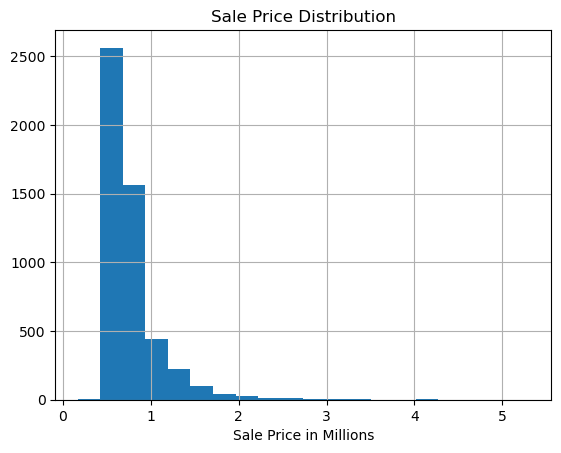

In [111]:
# plot histogram to check for distribution
(df['sold_price']/1e6).hist(bins=20)
plt.xlabel('Sale Price in Millions')
plt.title('Sale Price Distribution');
plt.savefig('hist1.png')

In [112]:
(df['sold_price']/1e6).describe()

count    4990.000000
mean        0.774951
std         0.318780
min         0.169000
25%         0.585000
50%         0.675000
75%         0.836750
max         5.300000
Name: sold_price, dtype: float64

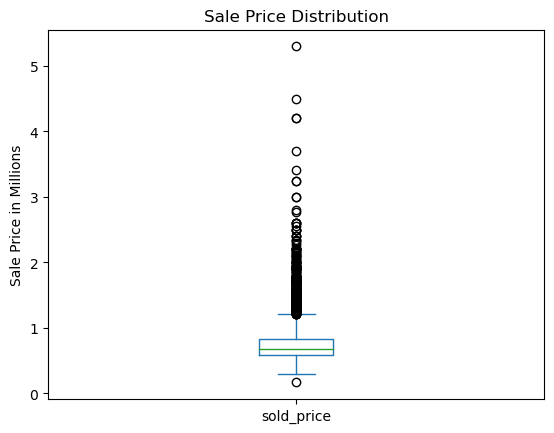

In [113]:
(df['sold_price']/1e6).plot(kind='box')
plt.ylabel('Sale Price in Millions')
plt.title('Sale Price Distribution');
plt.savefig('box1.png')
# there are some outliers in the price

In [114]:
# remove top 10% of the data because outliers can not be generalized
low, high= df['sold_price'].quantile([0.1, 0.9])

mask_no_outlier=df['sold_price'].between(low, high)
df=df[mask_no_outlier]


In [115]:
df['sold_price'].max()

1100000.0

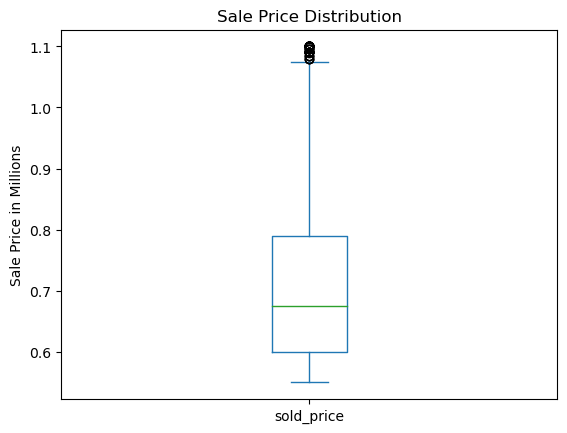

In [116]:
(df['sold_price']/1e6).plot(kind='box')
plt.ylabel('Sale Price in Millions')
plt.title('Sale Price Distribution');
plt.savefig('box2.png')

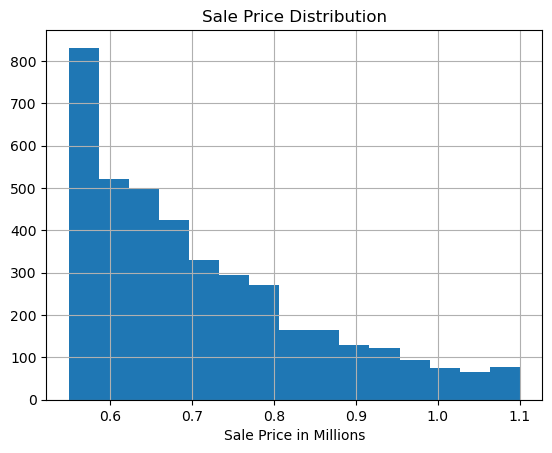

In [117]:
(df['sold_price']/1e6).hist(bins=15)
plt.xlabel('Sale Price in Millions')
plt.title('Sale Price Distribution');
plt.savefig('hist2.png')

In [118]:
# check if there is any colinearity 
features=df
c=features.corr()


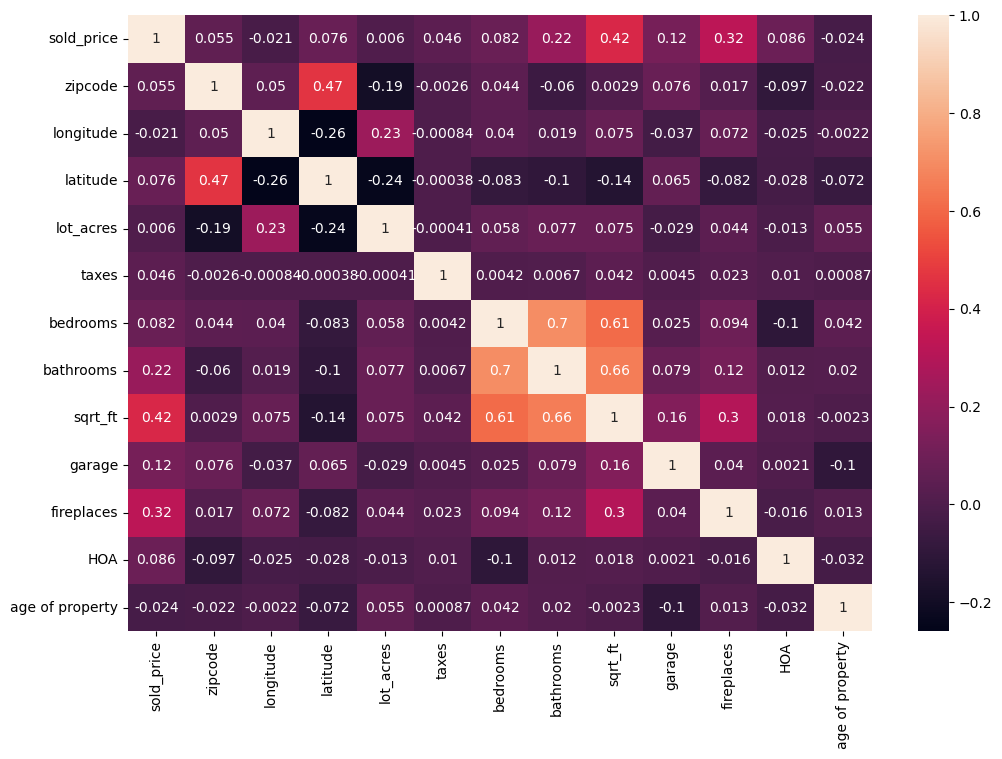

In [119]:
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True)
plt.savefig('corr.png');

In [120]:
df.drop(columns=['zipcode', 'bedrooms', 'bathrooms'], inplace=True)

In [121]:
# check if there is any colinearity 
features=df
c=features.corr()



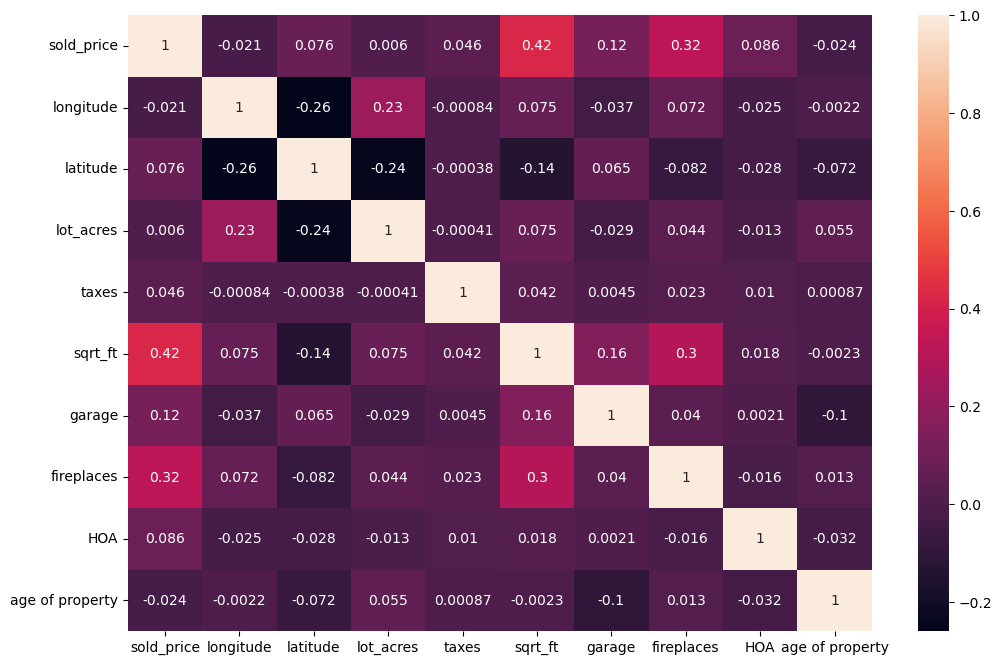

In [122]:
plt.figure(figsize=(12,8))
sns.heatmap(c, annot=True)
plt.savefig('corrlast.png');

In [123]:
#strong correlation only with three features namely: fireplace, sqrt_feet, and garage.
# latitude, HOA has weak correlation
# 'longitude': low correlation, 'lot_acres':low correlation, 'age of property':low correlation, 'taxes': could cause data leakage

In [124]:
# drop four columns which have least correlation
df.drop(['lot_acres', 'age of property', 'taxes'], axis=1, inplace=True)

In [125]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4064 entries, 217 to 4998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_price  4064 non-null   float64
 1   longitude   4064 non-null   float64
 2   latitude    4064 non-null   float64
 3   sqrt_ft     4029 non-null   float64
 4   garage      4062 non-null   float64
 5   fireplaces  4050 non-null   float64
 6   HOA         3603 non-null   float64
dtypes: float64(7)
memory usage: 254.0 KB


In [126]:
features=df
c=features.corr()

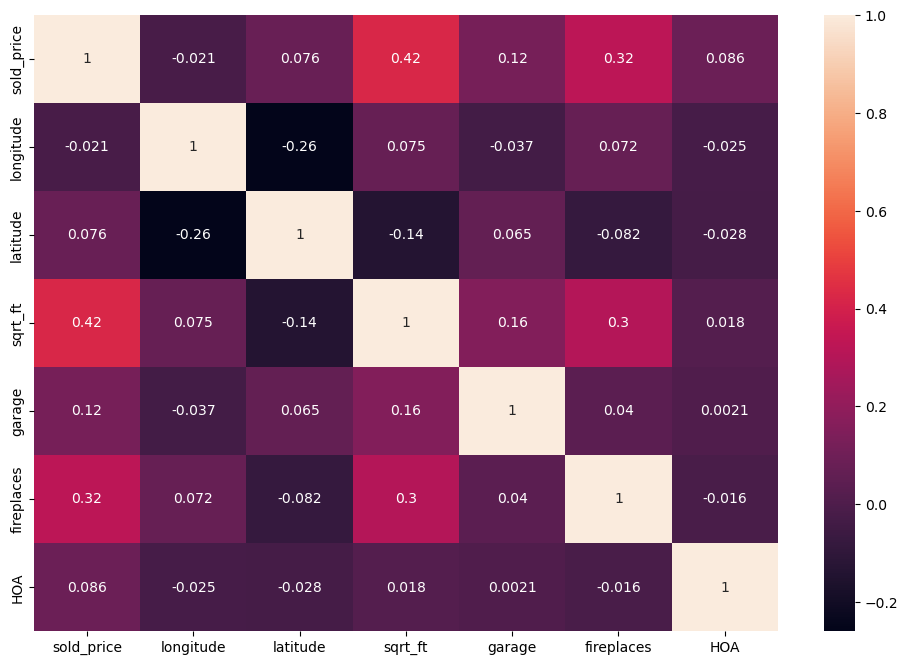

In [127]:
plt.figure(figsize=(12,8))
sns.heatmap(c, annot=True)
plt.savefig('final.png')

In [128]:
df.dropna(inplace=True)

In [129]:
df['HOA']=df['HOA'].fillna(df['HOA'].median())
df['HOA'].value_counts()


0.00       664
5.00       111
100.00      99
50.00       72
40.00       61
          ... 
1600.00      1
188.33       1
73.72        1
1100.00      1
36.66        1
Name: HOA, Length: 341, dtype: int64

In [130]:
df.to_csv('cleaned_house_data.csv')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3580 entries, 217 to 4996
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_price  3580 non-null   float64
 1   longitude   3580 non-null   float64
 2   latitude    3580 non-null   float64
 3   sqrt_ft     3580 non-null   float64
 4   garage      3580 non-null   float64
 5   fireplaces  3580 non-null   float64
 6   HOA         3580 non-null   float64
dtypes: float64(7)
memory usage: 223.8 KB
